<a href="https://colab.research.google.com/github/Dedeepya200/Mazesolver_geneticalgo/blob/main/housing_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
housing_data = pd.read_csv('/content/Housing.csv')

In [ ]:

# Import the required libraries for data processing and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the required libraries for machine learning
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

# Function for data preprocessing
def data_preprocessing(data):

    # One-hot encoding for categorical variables
    data_encoded = pd.get_dummies(data, drop_first=True)
    print(data_encoded.head())
    # Splitting the data into features and target variable
    X = data_encoded.drop('price', axis=1)
    y = data_encoded['price']

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    return X_train, X_test, y_train, y_test
# Function to plot actual vs predicted prices
def plot_actual_vs_predicted(model, X_test, y_test):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title('Actual vs Predicted Prices')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--') # Reference line
    plt.show()



# Function for training the model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model


# Function to plot the learning curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_mean_squared_error', shuffle=True)

    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Error')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.plot(train_sizes, test_mean, label='Validation Error')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
    plt.xlabel("Training Set Size")
    plt.ylabel("MSE")
    plt.title("Linear Regression - Learning Curve")
    plt.legend()
    plt.show()



In [ ]:
import pandas as pd
from tqdm.auto import tqdm

# Load the data
adult_data = pd.read_csv('adult-2.csv')

# Define the clean_data function
def clean_data(df):
    # Replace '?' with the mode in workclass, occupation, and native-country columns
    df['workclass'].replace('?', df['workclass'].mode()[0], inplace=True)
    df['occupation'].replace('?', df['occupation'].mode()[0], inplace=True)
    df['native-country'].replace('?', df['native-country'].mode()[0], inplace=True)
    # Convert income column to 0/1
    df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
    # Drop duplicate rows
    df.drop_duplicates(inplace=True)
    # Map education categories to broader categories
    edu_mapping = {
        '1st-4th': 'HS',
        '5th-6th': 'HS',
        '7th-8th': 'HS',
        '9th': 'HS',
        '10th': 'HS',
        '11th': 'HS',
        '12th': 'HS',
        'HS-grad': 'HS',
        'Some-college': 'College',
        'Assoc-voc': 'College',
        'Assoc-acdm': 'College',
        'Bachelors': 'University',
        'Masters': 'University',
        'Prof-school': 'University',
        'Doctorate': 'University',
        'Preschool': 'Pre-HS'
    }
    df['education'] = df['education'].map(edu_mapping)
    return df

# Clean the data
adult_data_cleaned = clean_data(adult_data)

# Show the head of the cleaned dataframe
print(adult_data_cleaned.head())

# Show the unique values in the 'education' column after mapping
print(adult_data_cleaned['education'].unique())

   age  workclass  fnlwgt education  educational-num      marital-status  \
0   25    Private  226802        HS                7       Never-married   
1   38    Private   89814        HS                9  Married-civ-spouse   
2   28  Local-gov  336951   College               12  Married-civ-spouse   
3   44    Private  160323   College               10  Married-civ-spouse   
4   18    Private  103497   College               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4     Prof-specialty    Own-child  White  Female             0             0   

   hours-per-week native-country  income  
0              40  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


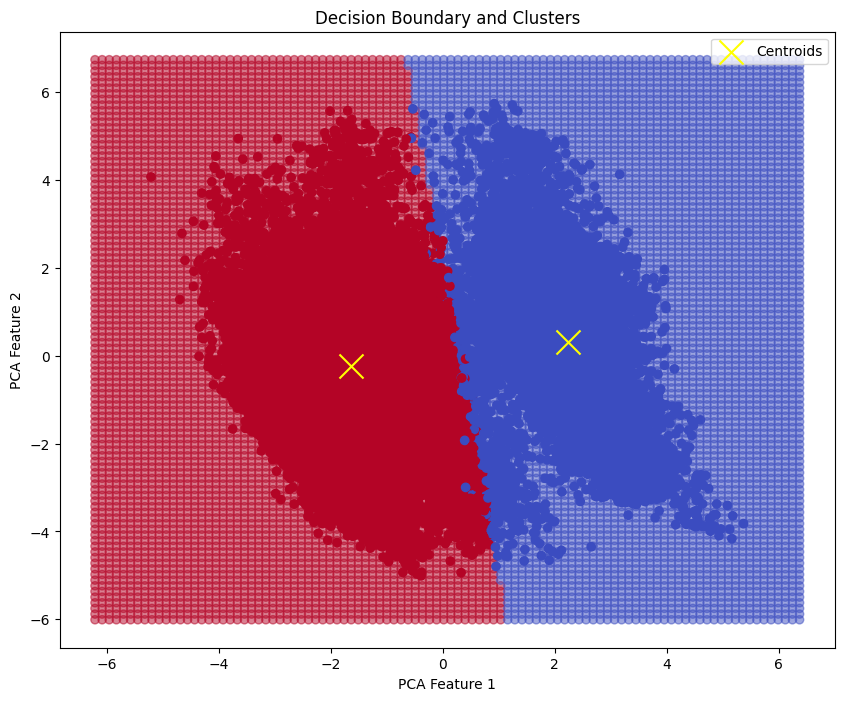

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Initialize OneHotEncoder and StandardScaler
ohe = OneHotEncoder()
scaler = StandardScaler()
pca = PCA(n_components=4)
kmeans = KMeans(n_clusters=2)

# One-hot encode the categorical features
adult_data_encoded = pd.get_dummies(adult_data_cleaned.drop('income', axis=1))

# Add the 'income' column back to the encoded dataframe
adult_data_encoded['income'] = adult_data_cleaned['income']

# Scale the features
features_scaled = scaler.fit_transform(adult_data_encoded.drop('income', axis=1))

# Perform PCA to reduce to 4 components
features_pca = pca.fit_transform(features_scaled)

# Fit K Means model
kmeans.fit(features_pca)

# Create a meshgrid for the first two principal components
resolution = 100
grid_x = np.linspace(features_pca[:, 0].min() - 1, features_pca[:, 0].max() + 1, resolution)
grid_y = np.linspace(features_pca[:, 1].min() - 1, features_pca[:, 1].max() + 1, resolution)
grid = np.meshgrid(grid_x, grid_y)

# Flatten the grid to create a list of points
flat_grid = np.array(grid).reshape(2, -1).T

# We need to extend this grid to 4 dimensions
# Since we don't have information for the other two dimensions, we'll use zeros
flat_grid_extended = np.hstack((flat_grid, np.zeros((flat_grid.shape[0], 2))))

# Predict labels for each point in the extended meshgrid
labels = kmeans.predict(flat_grid_extended)

# Plotting with a for the decision boundary and clusters
plt.figure(figsize=(10, 8))
plt.scatter(flat_grid[:, 0], flat_grid[:, 1], c=labels, alpha=0.5, cmap='coolwarm')
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans.labels_, cmap='coolwarm', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='x')
plt.title('Decision Boundary and Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate inertia and silhouette score
inertia = kmeans.inertia_
silhouette = silhouette_score(features_pca, kmeans.labels_)

# Print the scores
print("Inertia score: ", inertia)
print("Silhouette score: ", silhouette)

Inertia score:  429742.37163731956
Silhouette score:  0.3185867181968193


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


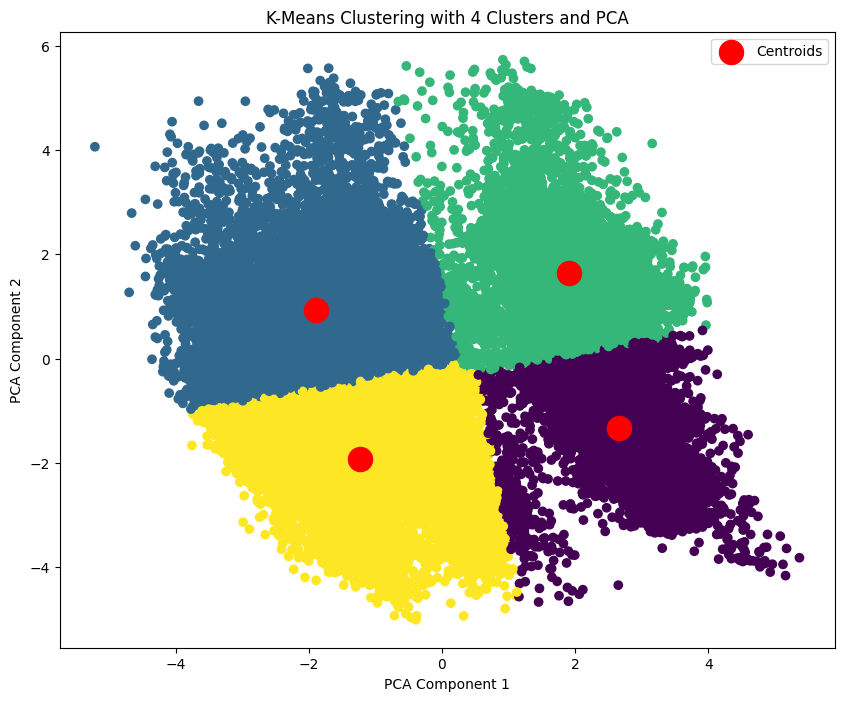

Inertia with 4 Clusters: 85031.62611060005
Silhouette Score with 4 Clusters: 0.44166082731163525


In [ ]:

# Drop the target variable 'income'
X = adult_data_cleaned.drop('income', axis=1)

# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply PCA with 4 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)

# Perform K-Means clustering using the first two PCA components
kmeans_2 = KMeans(n_clusters=4, random_state=42)
kmeans_2.fit(X_pca[:, :2])

# Plot the clusters and decision boundaries
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_2.labels_, cmap='viridis')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering with 4 Clusters and PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Calculate Inertia and Silhouette Score
inertia_4 = kmeans_2.inertia_
silhouette_4 = silhouette_score(X_pca[:, :2], kmeans_2.labels_)

# Print Inertia and Silhouette Score
print('Inertia with 4 Clusters:', inertia_4)
print('Silhouette Score with 4 Clusters:', silhouette_4)

  0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

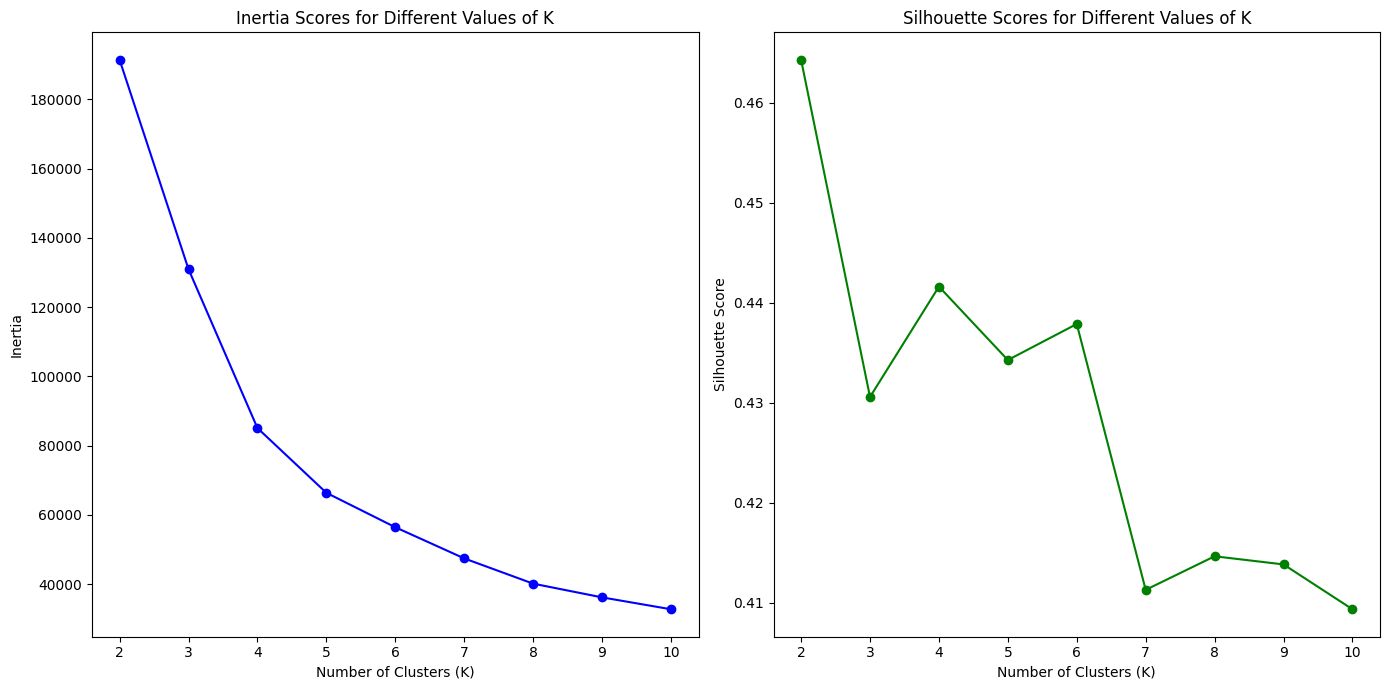

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

# Apply PCA with 2 components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Test different values of K and calculate inertia and silhouette score for each
K_values = range(2, 11)
inertia_scores = []
silhouette_scores = []

for K in tqdm(K_values):
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X_pca_2)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca_2, kmeans.labels_))

# Plot the results
plt.figure(figsize=(14, 7))

# Inertia plot
plt.subplot(1, 2, 1)
plt.plot(K_values, inertia_scores, marker='o', color='blue')
plt.title('Inertia Scores for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(K_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()